### DNC-Approved Polls

In [1]:
import pandas as pd
import numpy as np
import calendar
import altair as alt

In [2]:
file = pd.read_csv('scraped_polls_duplicates_removed.csv')

In [3]:
# So that missing poll averages (indicated by -1) are ignored
file = file.replace({-1:np.nan})

In [4]:
file['Poll_End_Date'] = pd.to_datetime(file['Poll_End_Date'])

In [5]:
file['Month'] = file['Poll_End_Date'].dt.month

In [6]:
file.head(1)

,Dates,Region,Pollster,Sample,Voter_Type,Pollster_Grade,Biden,Sanders,Harris,Warren,...,Gabbard,Klobuchar,Steyer,Poll_End_Date,Cell,Landline,Text,Online,Mail,Month
0,"Sep 30-Oct 3, 2019",National,HarrisX,783,LV,C+,33.0,12.0,6.0,22.0,...,0.0,2.0,1.0,2019-10-03,NaN,NaN,NaN,1,NaN,10


In [12]:
file.Pollster.sort_values().unique()

array(['ABC News/Washington Post', 'Avalanche Strategy',
       'Bendixen & Amandi International', 'Benenson Strategy Group*',
       'Bold Blue Campaigns', 'CBS News/YouGov', 'CNN', 'Capitol Weekly',
       'Change Research', 'Chism Strategies', 'Civiqs',
       'Claster Consulting', 'Climate Nexus', 'Crantford Research',
       'D-CYFOR', 'David Binder Research', 'Denno Research',
       'Des Moines Register', 'Echelon Insights', 'Emerson College',
       'Firehouse Strategies/Øptimus', 'Florida Atlantic University',
       'Fox News', 'Franklin & Marshall College', 'GBAO', 'GQR Research',
       'Goucher College', 'Gravis Marketing', 'Hampton University',
       'Harris Poll', 'HarrisX', 'High Point University', 'IBD/TIPP',
       'Ipsos', 'Landmark Communications', 'Marquette Law School',
       'McLaughlin & Associates', 'Monmouth University',
       'Morning Consult', 'Muhlenberg College',
       'NBC News/Wall Street Journal', 'Pew Research Center',
       'Public Policy Institu

In [8]:
# From: https://democrats.org/news/dnc-announces-qualification-criteria-for-fifth-presidential-primary-debate/
dnc_polls = ['Associated Press', 'ABC News/Washington Post', 'CBS News/YouGov', 'CNN', 'Des Moines Register', 'Fox News', 
             'Monmouth University', 'National Public Radio', 'NBC News/Wall Street Journal', 'NBC News/Marist', 'New York Times', 
             'Quinnipiac University', 'University of New Hampshire', 'USA Today/Suffolk University', 'Winthrop University']

*Adjusting Names to Match FiveThirtyEight w/ DNC List

In [9]:
file.Pollster = file.Pollster.replace({'Selzer & Co.':'Des Moines Register', 
                                       'CNN/SSRS':'CNN', 
                                       'Suffolk University':'USA Today/Suffolk University'})

In [10]:
# Assigning new pollster name to YouGov polls done in state primary polls, since these were specifically done with/for CBS
file.loc[((file.Pollster == 'YouGov') & (file.Region != 'National')), 'Pollster'] = 'CBS News/YouGov'

Approved Pollsters That Haven't Released Polls:

In [11]:
for pollster in dnc_polls:
    if pollster not in file.Pollster.unique():
        print(pollster)

Associated Press
National Public Radio
NBC News/Marist
New York Times


---

In [13]:
# Conditions:
appr_poll = file.Pollster.isin(dnc_polls)
appr_reg = file.Region.isin(['National', 'Iowa', 'New Hampshire', 'South Carolina', 'Nevada'])

In [16]:
dnc_df = file[appr_poll & appr_reg].sort_values('Poll_End_Date', ascending=True)

In [17]:
len(dnc_df)

69

In [18]:
non_dnc_df = file[~(appr_poll & appr_reg)]

In [19]:
len(non_dnc_df)

354

In [20]:
len(file)

423

In [21]:
dnc_df.Region.value_counts()

National          37
New Hampshire     11
Iowa              10
South Carolina     7
Nevada             4
Name: Region, dtype: int64

## (1) How Many Approved Polls Were Released?

In [22]:
len(dnc_df)

69

In [23]:
len(file)

423

In [24]:
round(69 / 423 * 100, 1)

16.3

In [22]:
dnc_df.loc[:, :'Steyer'].head()

,Dates,Region,Pollster,Sample,Voter_Type,Pollster_Grade,Biden,Sanders,Harris,Warren,Buttigieg,Booker,Yang,Williamson,O'Rourke,Delaney,Castro,Gabbard,Klobuchar,Steyer
418,"Dec 6-9, 2018",National,CNN,463,A,A-,30.0,14.0,4.0,3.0,NaN,5.0,NaN,NaN,9.0,0.0,0.0,NaN,3.0,0.0
415,"Dec 10-13, 2018",Iowa,Des Moines Register,455,LV,A+,32.0,19.0,5.0,8.0,NaN,4.0,0.0,NaN,11.0,1.0,1.0,NaN,3.0,0.0
401,"Jan 21-24, 2019",National,ABC News/Washington Post,447,A,A+,9.0,4.0,8.0,2.0,NaN,1.0,NaN,NaN,3.0,NaN,0.0,NaN,1.0,NaN
400,"Jan 25-27, 2019",National,Monmouth University,313,RV,A+,29.0,16.0,11.0,8.0,0.0,4.0,1.0,NaN,7.0,0.0,1.0,1.0,2.0,NaN
388,"Feb 7-15, 2019",New Hampshire,CBS News/YouGov,337,LV,B,28.0,20.0,14.0,9.0,NaN,3.0,NaN,NaN,6.0,NaN,1.0,NaN,1.0,NaN


In [30]:
round(dnc_df[dnc_df.Williamson.isnull()].shape[0] / dnc_df.shape[0], 2)

0.13

In [29]:
round(non_dnc_df[non_dnc_df.Williamson.isnull()].shape[0] / non_dnc_df.shape[0], 2)

0.32

In [31]:
round(dnc_df[dnc_df.Yang.isnull()].shape[0] / dnc_df.shape[0], 2)

0.07

In [32]:
round(non_dnc_df[non_dnc_df.Yang.isnull()].shape[0] / non_dnc_df.shape[0], 2)

0.18

In [34]:
round(dnc_df[dnc_df.Booker.isnull()].shape[0] / dnc_df.shape[0], 2)

0.0

In [33]:
round(non_dnc_df[non_dnc_df.Booker.isnull()].shape[0] / non_dnc_df.shape[0], 2)

0.03

---

Monthly Counts:

In [23]:
total_counts = []
for month in dnc_df.Month.unique():
    df = dnc_df[dnc_df.Month == month]
    # Counting multiple polls from same pollster on same date as one poll
    poll_count = 0
    for pollster in df.Pollster.unique():
        poll_count +=  len(df['Poll_End_Date'][df.Pollster == pollster])
    total_counts.append(poll_count)

In [24]:
months = [calendar.month_abbr[x] for x in dnc_df.Month.unique()]

In [25]:
# Produced chart w/ this data via DataWrapper
dnc_monthly_totals = pd.DataFrame({'Month':months, 
                                   'Count':total_counts})
dnc_monthly_totals

,Month,Count
0,Dec,2
1,Jan,2
2,Feb,2
3,Mar,5
4,Apr,7
5,May,5
6,Jun,10
7,Jul,12
8,Aug,8
9,Sep,16


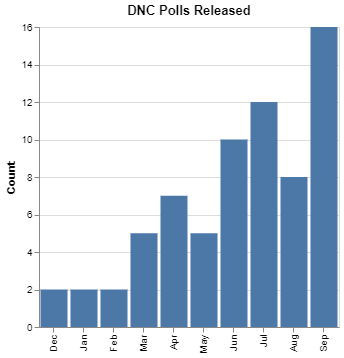

In [26]:
alt.Chart(dnc_monthly_totals, title='DNC Polls Released').mark_bar().encode(
x=alt.X('Month', sort=months, title=None),
y='Count').properties(background='white', width=300)

Monthly Counts By Region:

In [27]:
state_counts = []
nat_counts = []

for month in dnc_df.Month.unique():
    df = dnc_df[dnc_df.Month == month]
    # Counting multiple polls from same pollster on same date as one poll
    state_count = 0
    nat_count = 0
    for pollster in df.Pollster.unique():
        state_count +=  len(df['Poll_End_Date'][(df.Pollster == pollster) & (df.Region != 'National')])
        nat_count +=  len(df['Poll_End_Date'][(df.Pollster == pollster)  & (df.Region == 'National')])
    state_counts.append(state_count)
    nat_counts.append(nat_count)

In [28]:
# Produced chart w/ this data via DataWrapper
dnc_monthly_totals = pd.DataFrame({'Month':months, 
                                   'State_Count':state_counts,
                                   'Nat_Count':nat_counts})
dnc_monthly_totals

,Month,State_Count,Nat_Count
0,Dec,1,1
1,Jan,0,2
2,Feb,2,0
3,Mar,1,4
4,Apr,3,4
5,May,1,4
6,Jun,5,5
7,Jul,7,5
8,Aug,2,6
9,Sep,10,6


---

## (2) DNC-Approved Polls Bias?

In [29]:
# To display earlier months first
non_dnc_df = non_dnc_df[::-1]

In [30]:
dnc_df.Month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [31]:
non_dnc_df.tail(1)

,Dates,Region,Pollster,Sample,Voter_Type,Pollster_Grade,Biden,Sanders,Harris,Warren,...,Gabbard,Klobuchar,Steyer,Poll_End_Date,Cell,Landline,Text,Online,Mail,Month
0,"Sep 30-Oct 3, 2019",National,HarrisX,783,LV,C+,33.0,12.0,6.0,22.0,...,0.0,2.0,1.0,2019-10-03,NaN,NaN,NaN,1,NaN,10


Cumulative Avg. Poll #s

In [32]:
appr_avg = []
non_appr_avg = []
for cand in non_dnc_df.columns[6:-7]:
    appr_avg.append(dnc_df[cand].mean().round(1))
    non_appr_avg.append(non_dnc_df[cand].mean().round(1))

In [33]:
# Produced chart w/ this data via DataWrapper
cumulative = pd.DataFrame({'Candidate':dnc_df.columns[6:-7], 'DNC-Approved':appr_avg, 'Non-Approved':non_appr_avg}).sort_values('DNC-Approved', ascending=False)
cumulative['Difference'] = cumulative['DNC-Approved'] - cumulative['Non-Approved']
cumulative

,Candidate,DNC-Approved,Non-Approved,Difference
0,Biden,28.9,29.2,-0.3
1,Sanders,16.5,17.0,-0.5
3,Warren,13.5,13.2,0.3
2,Harris,8.1,8.4,-0.3
4,Buttigieg,6.0,6.1,-0.1
8,O'Rourke,3.2,4.4,-1.2
5,Booker,2.3,2.6,-0.3
12,Klobuchar,1.6,1.4,0.2
6,Yang,1.4,1.7,-0.3
13,Steyer,1.2,0.7,0.5


Previous 2 Months (DNC-Approved):

In [34]:
regional_avgs = {}
recent_df = file[file.Month.isin([8, 9])]
nat_states = ['National', 'Iowa', 'New Hampshire', 'South Carolina', 'Nevada']
for cand in recent_df.columns[6:-7]:
    df = recent_df[recent_df[cand].notnull()]
    reg_avgs = []
    reg_counts = []
    for region in nat_states:
        reg_series = df[cand][df.Region == region]
        reg_avgs.append(reg_series.mean().round(1))
        reg_counts.append(len(reg_series))
    regional_avgs[cand] = pd.DataFrame({'Region':nat_states, 'Poll_Count':reg_counts, 'Average':reg_avgs}).sort_values('Average', ascending=False)

In [35]:
regional_avgs

{'Biden':            Region  Poll_Count  Average
 3  South Carolina           5     37.8
 0        National          82     28.7
 4          Nevada           5     24.6
 1            Iowa           6     22.5
 2   New Hampshire           9     22.4,
 'Sanders':            Region  Poll_Count  Average
 4          Nevada           5     19.4
 2   New Hampshire           9     18.0
 0        National          82     16.6
 1            Iowa           6     14.7
 3  South Carolina           5     12.0,
 'Harris':            Region  Poll_Count  Average
 0        National          82      6.8
 1            Iowa           6      6.8
 4          Nevada           5      6.8
 3  South Carolina           5      6.6
 2   New Hampshire           9      5.9,
 'Warren':            Region  Poll_Count  Average
 1            Iowa           6     22.2
 2   New Hampshire           9     20.8
 4          Nevada           5     18.6
 0        National          82     16.9
 3  South Carolina           5     15

Monthly Averages (DNC-Approved & Non-Approved):

In [36]:
monthly_avgs = {}
for cand in dnc_df.columns[6:-7]:
    appr_avgs = []
    appr_maxs = []
    non_appr_avgs = []
    non_appr_maxs = []
    for month in dnc_df.Month.unique():
        appr_avgs.append(dnc_df[cand][dnc_df.Month == month].mean())
        appr_maxs.append(dnc_df[cand][dnc_df.Month == month].max())        
        non_appr_avgs.append(non_dnc_df[cand][non_dnc_df.Month == month].mean())
        non_appr_maxs.append(non_dnc_df[cand][non_dnc_df.Month == month].max())
    monthly_avgs[cand] = pd.DataFrame({'Month':[calendar.month_abbr[x] for x in dnc_df.Month.unique()], 
                                       'Approved Avg':appr_avgs, 
                                       'Approved Max':appr_maxs, 
                                       'Non-Approved Avg':non_appr_avgs, 
                                       'Non-Approved Max':non_appr_maxs})

In [37]:
monthly_avgs['Biden']

,Month,Approved Avg,Approved Max,Non-Approved Avg,Non-Approved Max
0,Dec,31.000000,32.0,23.166667,30.0
1,Jan,19.000000,29.0,29.600000,45.0
2,Feb,25.000000,28.0,28.388889,39.0
3,Mar,28.600000,31.0,31.250000,42.0
4,Apr,26.571429,39.0,26.956522,41.0
5,May,34.200000,36.0,35.585366,48.0
6,Jun,31.400000,45.0,31.543478,50.0
7,Jul,29.750000,39.0,27.372881,47.0
8,Aug,28.000000,32.0,27.365385,37.0
9,Sep,28.250000,43.0,27.558824,41.0


---

Additional Visualization Idea:

Map which region is each candidate strongest in (choropleth map- min 3 polls in that state)
*Make a slider or time-lapse to show how support shifted each month (though could only include states where a poll was released there each month- or maybe do the time-lapse shifting over a two-month period)

---

### Nov Debate Qualifying Polls

In [38]:
cols = ['Dates', 'Region', 'Pollster', 'Biden', 'Warren', 'Sanders', 'Harris', 'Buttigieg', 'Yang', 'Booker', "O'Rourke", 'Castro', 'Klobuchar',  'Gabbard', 'Steyer', 'Williamson', 'Delaney']

In [39]:
# Produced chart w/ this data via DataWrapper
nov_deb = dnc_df[cols][::-1].head(15)
nov_deb[nov_deb.columns[3:]] = nov_deb[nov_deb.columns[3:]].astype(int)
nov_deb

,Dates,Region,Pollster,Biden,Warren,Sanders,Harris,Buttigieg,Yang,Booker,O'Rourke,Castro,Klobuchar,Gabbard,Steyer,Williamson,Delaney
3,"Sep 21-30, 2019",South Carolina,Winthrop University,37,17,8,7,4,2,3,2,1,1,1,2,0,0
7,"Sep 23-29, 2019",National,Monmouth University,25,28,15,5,5,2,1,1,1,1,0,1,2,0
11,"Sep 22-26, 2019",Nevada,CNN,22,18,22,5,4,3,2,0,0,1,1,4,1,0
12,"Sep 22-26, 2019",South Carolina,CNN,37,16,11,3,4,0,2,2,0,1,1,3,1,0
17,"Sep 19-23, 2019",Nevada,USA Today/Suffolk University,23,19,14,4,3,3,2,1,1,0,1,3,0,0
18,"Sep 19-23, 2019",National,Quinnipiac University,25,27,16,3,7,2,0,2,2,2,1,0,0,0
23,"Sep 17-21, 2019",New Hampshire,Monmouth University,25,27,12,3,10,2,2,1,0,2,2,2,1,0
34,"Sep 14-18, 2019",Iowa,Des Moines Register,20,22,11,6,9,2,3,2,1,3,2,2,0,1
37,"Sep 15-17, 2019",National,Fox News,29,16,18,7,5,2,3,4,0,2,0,1,0,1
41,"Sep 13-16, 2019",National,NBC News/Wall Street Journal,31,25,14,5,7,4,2,1,1,2,1,1,0,1
